# *DA lab 4주차 네트워크 분석: 특허데이터에서 IPC 동시출현 네트워크 생성*

## Network analysis

### Contents
* 데이터베이스 connection
* (특허번호, IPC) list 생성
* key: 특허번호의 value: (IPC1, IPC2) Dictionary 생성
* key: (IPC1, IPC2)의 value: Frequency 인 Dictionary 생성
* IPC 동시출현 네트워크 생성
* (IPC1, IPC2, Frequency) 튜플 형식으로 변환
* 리스트로 network에 edge 추가
* 네트워크 생성 및 시각화
* 노드별 centrality 계산; key: 노드, value: centrality인 Dictionary

### Used Library
* pandas
* itertools
* pymysql
* networkx
* matplotlib

In [2]:
import pandas as pd
import itertools as it
import pymysql

### 데이터베이스 connection

In [4]:
conn = pymysql.connect(host="주소찾아쓰세요", user="class_da2019", password="비밀번호찾아쓰세요", db="tp_class_da2019", charset="utf8mb4")
cursor = conn.cursor()
cursor.execute("select paaa.특허등록번호 as reg_num, paaa.IPC4 as ipc4 from(select paa.특허등록번호, left(ipc.보유IPC전체코드,4) as IPC4 from(SELECT * FROM tp_class_da2019.us_patent pa order by pa.특허등록일자 desc limit 1000) paa inner join tp_class_da2019.ipc on paa.특허등록번호=ipc.특허등록번호) paaa group by paaa.특허등록번호, paaa.IPC4;")
db=cursor.fetchall()

### 쿼리문 설명
* 1000개 특허 선정: SELECT * FROM tp_class_da2019.us_patent pa order by pa.특허등록일자 desclimit 1000
* 특허 테이블과 IPC 테이블 조인: inner join tp_class_da2019.ipc on paa.특허등록번호=ipc.특허등록번호
* 특허가 가진 IPC 4자리 정보: select paaa.특허등록번호 as reg_num, paaa.IPC4 as ipc4 (~)from group by paaa.특허등록번호, paaa.IPC4

In [5]:
patent_list=[]
edg_list=[]

### (특허번호, IPC) list 생성

In [8]:
for reg_num, ipcfull in db:
    edg_list.append((reg_num, ipcfull)) # (특허,IPC,1), (특허, IPC,1)
    patent_list.append(reg_num)

In [9]:
edg_list

[('9848521', 'A01B'),
 ('9848521', 'B07B'),
 ('9848521', 'E02F'),
 ('9848522', 'A01B'),
 ('9848522', 'G01L'),
 ('9848523', 'A01B'),
 ('9848523', 'A01C'),
 ('9848523', 'G01L'),
 ('9848524', 'A01B'),
 ('9848524', 'A01C'),
 ('9848525', 'A01C'),
 ('9848525', 'B65G'),
 ('9848526', 'A01B'),
 ('9848526', 'A01C'),
 ('9848527', 'A01B'),
 ('9848527', 'A01C'),
 ('9848528', 'A01C'),
 ('9848528', 'G01S'),
 ('9848529', 'A01D'),
 ('9848530', 'A01D'),
 ('9848530', 'A01F'),
 ('9848531', 'A01D'),
 ('9848532', 'A01D'),
 ('9848533', 'A01D'),
 ('9848534', 'A01D'),
 ('9848535', 'A01D'),
 ('9848536', 'A01B'),
 ('9848536', 'A01D'),
 ('9848536', 'A01F'),
 ('9848536', 'B60P'),
 ('9848536', 'B65G'),
 ('9848537', 'A01D'),
 ('9848537', 'A01F'),
 ('9848538', 'A01B'),
 ('9848538', 'A01G'),
 ('9848538', 'B66F'),
 ('9848539', 'A01G'),
 ('9848539', 'B26B'),
 ('9848540', 'A01G'),
 ('9848540', 'F21V'),
 ('9848541', 'A01G'),
 ('9848542', 'A01G'),
 ('9848542', 'A01N'),
 ('9848542', 'C05G'),
 ('9848542', 'E02B'),
 ('9848543

In [10]:
edg_list2=dict()

In [11]:
edg_list[0]

('9848521', 'A01B')

In [12]:
edg_list2
# edg_list2[9848537]

{}

### key: 특허번호의 value: (IPC1, IPC2) Dictionary 생성

In [13]:
for reg, ipc in edg_list:
    if edg_list2.get(reg): #키가 없을 경우 none
        edg_list2[reg].append(ipc) #기존 특허의 값인 IPC 리스트에 append 추가!!
    else: 
        edg_list2[reg]=[ipc] #새로온 특허의 값으로 IPC 리스트 생성 {특허번호: (ipc1,ipc)}

In [14]:
edg_list2


{'9849504': ['B21D', 'B22D', 'B32B', 'C22C', 'B21D', 'B22D', 'B32B', 'C22C'],
 '9849053': ['A61F', 'A61G', 'A61F', 'A61G'],
 '9848665': ['A42B', 'F41H', 'G02C', 'A42B', 'F41H', 'G02C'],
 '9848614': ['A23C', 'C12N', 'A23C', 'C12N'],
 '9849025': ['A61B', 'A61F', 'A61N', 'A61B', 'A61F', 'A61N'],
 '9849183': ['A61K', 'A61K'],
 '9848879': ['A61B', 'A61B'],
 '9849313': ['A62B', 'B64D', 'A62B', 'B64D'],
 '9849370': ['A63F', 'G06F', 'G06Q', 'A63F', 'G06F', 'G06Q'],
 '9848874': ['A61B', 'A61B'],
 '9849206': ['A61L', 'B65D', 'A61L', 'B65D'],
 '9848736': ['A47J', 'B65D', 'B67D', 'A47J', 'B65D', 'B67D'],
 '9849429': ['A23L',
  'A47J',
  'B01F',
  'B65B',
  'B65D',
  'A23L',
  'A47J',
  'B01F',
  'B65B',
  'B65D'],
 '9849213': ['A61K', 'A61L', 'A61K', 'A61L'],
 '9848700': ['A47B', 'A47B'],
 '9848869': ['A61B', 'A61F', 'A61B', 'A61F'],
 '9848657': ['A41B', 'A41B'],
 '9848973': ['A61B',
  'A61F',
  'A61L',
  'B29C',
  'B29K',
  'B29L',
  'C08J',
  'A61B',
  'A61F',
  'A61L',
  'B29C',
  'B29K',
  'B2

In [15]:
co_edlst={} # {(ipc1, ipc2), frequency}

### key: (IPC1, IPC2)의 value: Frequency 인 Dictionary 생성

In [16]:
#특허가 보유한 IPC 간의 동시출현빈도 계산: 특허의 IPC 리스트에서 쌍대비교
for k, v in edg_list2.items(): #items 리스트에서 key와 value를 호출하는 반복문
    for ipc1, ipc2 in it.combinations(v,2):
        tmp=(ipc1,ipc2) if ipc2<ipc1 else(ipc2, ipc1)
        if co_edlst.get(tmp, False):
            co_edlst[tmp]+=1
        else: 
            co_edlst[tmp]=1

In [17]:
co_edlst

{('A61K', 'A23L'): 12,
 ('B04C', 'B04C'): 1,
 ('F16B', 'B29L'): 4,
 ('B32B', 'B32B'): 7,
 ('H04B', 'A61B'): 4,
 ('G09F', 'G01F'): 8,
 ('F24J', 'F24J'): 1,
 ('G05B', 'G01D'): 4,
 ('H02N', 'H01L'): 4,
 ('B29L', 'A61F'): 8,
 ('A47L', 'A47B'): 4,
 ('A61K', 'A61F'): 20,
 ('G01M', 'A62C'): 4,
 ('B60T', 'A61G'): 4,
 ('G08B', 'B60K'): 4,
 ('F21V', 'F16B'): 4,
 ('G08G', 'G08B'): 4,
 ('C08K', 'C08K'): 3,
 ('B65C', 'B08B'): 4,
 ('C01C', 'B01J'): 4,
 ('F16D', 'F16D'): 1,
 ('D06F', 'A47L'): 4,
 ('C12P', 'A23K'): 4,
 ('A01H', 'A01G'): 4,
 ('G06F', 'G05D'): 8,
 ('B07B', 'B07B'): 6,
 ('B21F', 'A61L'): 8,
 ('G08B', 'B64F'): 4,
 ('B26B', 'A01G'): 4,
 ('B32B', 'A61G'): 4,
 ('H04Q', 'H04B'): 4,
 ('B23B', 'B21C'): 4,
 ('F16M', 'A47G'): 8,
 ('F27B', 'F27B'): 1,
 ('G06F', 'A61G'): 8,
 ('B32B', 'A61F'): 4,
 ('F16J', 'F04B'): 4,
 ('A23P', 'A23G'): 4,
 ('A47B', 'A47B'): 10,
 ('A61L', 'A61F'): 56,
 ('F21Y', 'F21Y'): 2,
 ('F27D', 'F27D'): 1,
 ('A01F', 'A01F'): 3,
 ('F16L', 'A47J'): 4,
 ('C12P', 'A23L'): 4,
 ('A47

## IPC 동시출현 네트워크 생성

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas
import collections

### (IPC1, IPC2, Frequency) 튜플 형식으로 변환

In [19]:
network_list=[]
for k,v in co_edlst.items():
    network_list.append((k[0],k[1],int(v)))

In [20]:
network_list

[('A61K', 'A23L', 12),
 ('B04C', 'B04C', 1),
 ('F16B', 'B29L', 4),
 ('B32B', 'B32B', 7),
 ('H04B', 'A61B', 4),
 ('G09F', 'G01F', 8),
 ('F24J', 'F24J', 1),
 ('G05B', 'G01D', 4),
 ('H02N', 'H01L', 4),
 ('B29L', 'A61F', 8),
 ('A47L', 'A47B', 4),
 ('A61K', 'A61F', 20),
 ('G01M', 'A62C', 4),
 ('B60T', 'A61G', 4),
 ('G08B', 'B60K', 4),
 ('F21V', 'F16B', 4),
 ('G08G', 'G08B', 4),
 ('C08K', 'C08K', 3),
 ('B65C', 'B08B', 4),
 ('C01C', 'B01J', 4),
 ('F16D', 'F16D', 1),
 ('D06F', 'A47L', 4),
 ('C12P', 'A23K', 4),
 ('A01H', 'A01G', 4),
 ('G06F', 'G05D', 8),
 ('B07B', 'B07B', 6),
 ('B21F', 'A61L', 8),
 ('G08B', 'B64F', 4),
 ('B26B', 'A01G', 4),
 ('B32B', 'A61G', 4),
 ('H04Q', 'H04B', 4),
 ('B23B', 'B21C', 4),
 ('F16M', 'A47G', 8),
 ('F27B', 'F27B', 1),
 ('G06F', 'A61G', 8),
 ('B32B', 'A61F', 4),
 ('F16J', 'F04B', 4),
 ('A23P', 'A23G', 4),
 ('A47B', 'A47B', 10),
 ('A61L', 'A61F', 56),
 ('F21Y', 'F21Y', 2),
 ('F27D', 'F27D', 1),
 ('A01F', 'A01F', 3),
 ('F16L', 'A47J', 4),
 ('C12P', 'A23L', 4),
 ('A47

### 리스트로 network에 edge 추가

In [21]:
#add_weighted_edges_from([(0, 1, 3.0), (1, 2, 7.5)])
P=nx.Graph()
P.add_weighted_edges_from(network_list)

### 네트워크 생성 및 시각화

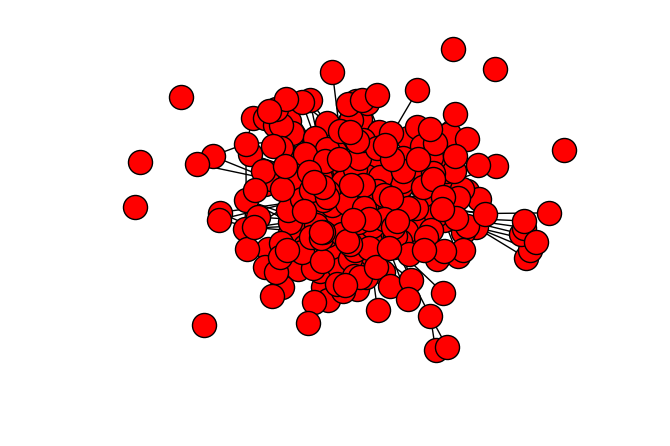

In [23]:
nx.draw_spring(P)
plt.show()

### 노드별 centrality 계산; key: 노드, value: centrality인 Dictionary

In [24]:
nx.degree_centrality(P).get('A01B')
#https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html

0.043010752688172046

In [25]:
nx.degree_centrality(P)

{'A01B': 0.043010752688172046,
 'A01C': 0.021505376344086023,
 'A01D': 0.021505376344086023,
 'A01F': 0.021505376344086023,
 'A01G': 0.05017921146953405,
 'A01H': 0.017921146953405017,
 'A01J': 0.017921146953405017,
 'A01K': 0.06093189964157706,
 'A01M': 0.02867383512544803,
 'A01N': 0.04659498207885305,
 'A21B': 0.017921146953405017,
 'A21C': 0.021505376344086023,
 'A21D': 0.03225806451612903,
 'A22C': 0.010752688172043012,
 'A23B': 0.007168458781362007,
 'A23C': 0.017921146953405017,
 'A23D': 0.02867383512544803,
 'A23G': 0.025089605734767026,
 'A23J': 0.014336917562724014,
 'A23K': 0.02867383512544803,
 'A23L': 0.08243727598566308,
 'A23P': 0.010752688172043012,
 'A24B': 0.010752688172043012,
 'A24D': 0.007168458781362007,
 'A24F': 0.06810035842293907,
 'A41B': 0.007168458781362007,
 'A41C': 0.007168458781362007,
 'A41D': 0.035842293906810034,
 'A41F': 0.010752688172043012,
 'A41G': 0.007168458781362007,
 'A42B': 0.03942652329749104,
 'A43B': 0.035842293906810034,
 'A43C': 0.0179211

In [26]:
nx.closeness_centrality(P)

{'A01B': 0.31087412337648695,
 'A01C': 0.29929529033876223,
 'A01D': 0.2689407984179953,
 'A01F': 0.2689407984179953,
 'A01G': 0.3457309351240461,
 'A01H': 0.2917223622003777,
 'A01J': 0.291081917936491,
 'A01K': 0.37560287144496224,
 'A01M': 0.30620742175536186,
 'A01N': 0.3559404392485146,
 'A21B': 0.28210173110653547,
 'A21C': 0.28949304283858446,
 'A21D': 0.3257685838330999,
 'A22C': 0.2620312522135804,
 'A23B': 0.0,
 'A23C': 0.2809063847882875,
 'A23D': 0.3051503190335367,
 'A23G': 0.31418913180111774,
 'A23J': 0.30444962943759285,
 'A23K': 0.31948870751824504,
 'A23L': 0.3713944359105649,
 'A23P': 0.2378256746548371,
 'A24B': 0.2845232051932869,
 'A24D': 0.0,
 'A24F': 0.40117341488675246,
 'A41B': 0.0,
 'A41C': 0.0,
 'A41D': 0.35169181331584,
 'A41F': 0.258707929014774,
 'A41G': 0.0,
 'A42B': 0.33105571440717024,
 'A43B': 0.32181508160211575,
 'A43C': 0.2689407984179953,
 'A43D': 0.2423908841317581,
 'A44B': 0.0,
 'A44C': 0.2530301786642589,
 'A45C': 0.2982852949832884,
 'A45D': 

In [27]:
nx.betweenness_centrality(P)

{'A01B': 0.017961658488334146,
 'A01C': 0.0005406282656173943,
 'A01D': 0.0,
 'A01F': 0.0,
 'A01G': 0.022033655373284677,
 'A01H': 0.00035488939063727133,
 'A01J': 0.00042351340039123436,
 'A01K': 0.022718508297975983,
 'A01M': 0.006094061864401727,
 'A01N': 0.015061114850251814,
 'A21B': 0.0,
 'A21C': 9.829502910559885e-05,
 'A21D': 0.0021185722875434465,
 'A22C': 0.0,
 'A23B': 0.0,
 'A23C': 8.559090424128702e-05,
 'A23D': 0.0009933341254701957,
 'A23G': 0.007402510383174558,
 'A23J': 0.0,
 'A23K': 0.0006913836132948386,
 'A23L': 0.0348035391341167,
 'A23P': 0.0,
 'A24B': 0.0,
 'A24D': 0.0,
 'A24F': 0.018690959751203967,
 'A41B': 0.0,
 'A41C': 0.0,
 'A41D': 0.011720109616625295,
 'A41F': 0.0,
 'A41G': 0.0,
 'A42B': 0.007674429518366059,
 'A43B': 0.0096013310875243,
 'A43C': 0.0006028926006947386,
 'A43D': 0.0,
 'A44B': 0.0,
 'A44C': 0.013924344395451382,
 'A45C': 0.00017319274035016398,
 'A45D': 0.000775311021906863,
 'A45F': 0.03368264495304966,
 'A46B': 0.0017431913859376777,
 'A47B